# Text classification :: Overview

## Task 

We want to build a Spam detector which, given examples of spam emails (e.g. flagged by users) and examples of regular (non-spam, also called "ham") emails, learns how to flag new unseen emails as spam or non-spam.

## Data

We will use the [SpamAssassin](https://spamassassin.apache.org/) public email corpus. This dataset contains ~6'000 labeled emails with a ~30% spam ratio. If you want to learn more about this dataset, check [this](https://spamassassin.apache.org/old/publiccorpus/). (*Note: Datasets of text are called corpora and samples are called documents.*) 

The dataset has been downloaded for you and is available in the *data* folder.

## Notebook overview

* Load the data
* Text preprocessing
* Data exploration
* Feature extraction
* Build a spam detector
* What did our model learn? Error analysis

# Text classification :: Spam detection


## Load the data

In [2]:
# Load libraries and helper functions
%run tools.py

In [3]:
# Load the data
df = load_data()

Data loaded.
Data size: (5832, 2)


Let's check the number of samples per class in the data.

Samples per class (%):
non-spam    70.3
spam        29.7
Name: label, dtype: float64




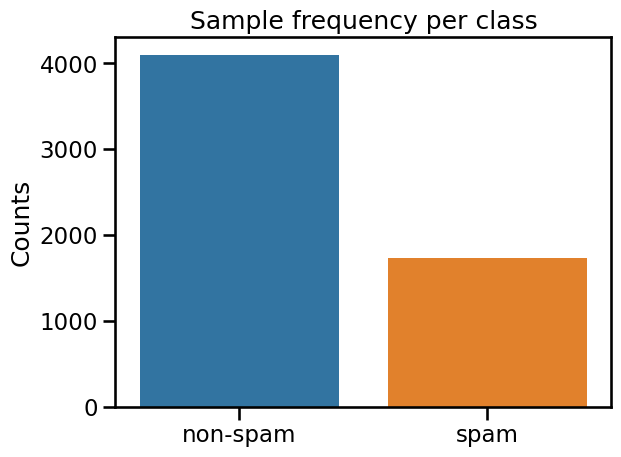

In [4]:
plot_class_frequency(df)

Now, let's have a look at a few rows from the dataset.

***Note:*** The *label* is 0 for *non-spam* and 1 for *spam*.

In [5]:
# If you rerun this cell then you get a different set of samples displayed
df.sample(3)

,label,text
531,0,"================================= TheServerSide Connection -Your J2EE Community Newsletter- ================================= September 4, 2002 Circulation: 130 000+ No. 42 IN THIS ISSUE -------------------------------------------------------------------------------- Featured Articles o Struts 1.1: Should I Upgrade? Hard Core Tech Talks o Amy Fowler - Senior Staff Engineer, Java Software, Sun Microsystems Upcoming Conferences o Great Lakes Software Symposium 2002 Enterprise Java Education Strategies o Floyd Marinescu to co-teach J2EE Patterns - Sept 16, Dallas New Patterns o iXML Pattern o Widget Pages New App Server Reviews o JRun 4.0 - Good Stuff Key J2EE Industry News Headlines Some key headlines: o Java Server Faces Public Draft and Early Access Available o Apache Cactus 1.4 J2EE Unit Testing Framework Released This newsletter is available in HTML format at: http://www.theserverside.com/resources/newsletters/news42.html?text-click"
452,1,"<html> <head> <meta http-equiv=""Content-Language"" content=""en-us""> <meta name=""GENERATOR"" content=""Microsoft FrontPage 5.0""> <meta name=""ProgId"" content=""FrontPage.Editor.Document""> <meta http-equiv=""Content-Type"" content=""text/html; charset=windows-1252""> <title>Take Control of Your Computer With This Top</title> </head> <body> <table border=""0"" width=""489"" height=""54"" bgcolor=""#ffffff""> <tr> <td width=""100%"" height=""48"" bgcolor=""#ffffff"" align=""Center""> <font face=""Impact"" color=""#cc0000"" size=""3"">Take Control of Your Computer With This Top-of-the-Line Software!</font></td> </tr> </table> <table border=""5"" cellspacing=""3"" width=""489"" cellpadding=""3"" bgcolor=""#990033"" bordercolor=""#ffffff"" style=""border-collapse: collapse"" bordercolordark=""#000000"" height=""567"" bordercolorlight=""#FFFF99""> <tr> <td width=""467"" height=""555"" bordercolorlight=""#FFFFFF"" bordercolordark=""#FFFF99""> <table border=""6"" width=""100%"" height=""86"" bgcolor=""#ffff99"" bordercolor=""#ffffff""> <tr> <td width=""100%"" height=""80"" align=""Center""><b> <font color=""#ff0000"" face=""Tahoma"" size=""6"">Norton SystemWorks 2002 </font><font face=""Tahoma"" size=""5"" color=""#000000"">Software Suite</font><font color=""#ff0000"" face=""Times New Roman"" size=""6""><br> -<i>Professional Edition</i>-</font></b></td> </tr> </table> <table border=""0"" width=""100%"" height=""62""> <tr> <td width=""100%"" height=""56"" align=""Center""><b> <font face=""Tahoma"" color=""#ffffff"" size=""4"">Includes Six - </font><i> <font face=""Tahoma"" size=""4"" color=""#ffff99"">Yes 6!</font></i><font face=""Tahoma"" color=""#ffffff"" size=""4""> - Feature-Packed Utilities<br> ALL for </font><font face=""Tahoma"" size=""4"" color=""#ffff99"">1</font><font face=""Tahoma"" color=""#ffffff"" size=""4""> Special </font><font face=""Tahoma"" size=""4"" color=""#ffff99"">LOW</font><font face=""Tahoma"" color=""#ffffff"" size=""4""> Price of </font><font face=""Tahoma"" size=""4"" color=""#ffff99"">Only $29.99!</font></b></td> </tr> </table> <table border=""4"" width=""100%"" height=""135"" bgcolor=""#800000"" bord..."
223,1,DON'T MISS OUT ON AN AMAZING BUSINESS OPPORTUNITY AND WEIGHT LOSS PRODUCT! PLEASE VISIT www.good4u.autodreamteam.com THERE IS NO OBLIGATION AND IT'S WORTH A LOOK!


## Text preprocessing

Good text preprocessing is an essential part of every NLP project!

Our goal here is to build a model that distinguishes non-spam from spam. The idea here is to "clean" and "standardize" raw text before feeding it to our machine learning model. We need to keep as many "informative" words as possible, while discarding the "uniformative" ones. Removing unnecessary content, i.e. the "noise", from our texts will help to improve the accuracy of our models.

## 💡 Observations

- There are some items in the text that should be removed to make it readable. Here are some suggestions:

* HTML tags 
* URLs
* E-mail addresses
* Punctuation marks, digits (e.g. 2002, 1.1, ...)
* Multiple whitespaces
* Case conversion (e.g. Dog vs dog, ...)
* English STOPWORDS (e.g. a, is, my, i, all, and, by...)
* ...

- It is likely that the number of occurrences of the above items (HTML tags, URLs, etc) is helpful to distinguish spam from non-spam. Similarly, the length of the emails and the frequency of punctuation marks or upper case letters may also give us clues as to whether we are dealing with spam or not.

The *clean_corpus* function below will take care of the parts raised in the 1st observation. For the ideas from the 2nd observation we will create new features and investigate their effects in the subsection **What about "spammish" signatures?**. 

In [6]:
df = clean_corpus(df)

print("Data cleaned")

Data cleaned


Let's have a look at a few "cleaned" examples.

In [7]:
show_clean_text(df)


Original document:

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"> <html> <body bgcolor="#FFFFFF"
marginwidth="0" marginheight="0" topmargin="0" leftmargin="0"> <CENTER> <TABLE width="600"
cellspacing="0" cellpadding="0" border="0"> <TR> <TD> <TABLE cellspacing="0" cellpadding="0"
border="0"> <TR> <TD><A HREF="http://www.divl.com/index.asp?L=0&CID=86"><img
src="http://www.divl.com/images/top_flag.gif" width="175" height="80" border="0"></A></TD> <TD><img
src="http://www.divl.com/images/mail/top_blue.gif" width="425" height="80" border="0"></TD> </TR>
</TABLE> </TD> </TR> <TR> <TD> <TABLE cellspacing="0" cellpadding="0" border="0"> <TR> <TD><A
HREF="http://www.divl.com/application.asp?L=0&CID=86"><img
src="http://www.divl.com/images/btn_apply0.gif" width="124" height="30" border="0"></A></TD> <TD><A
HREF="http://www.divl.com/general.asp?L=0&CID=86"><img
src="http://www.divl.com/images/btn_requirements0.gif" width="132" height="30" border="0"></A></TD>
<TD><A HREF="http:

## Data Exploration :: What makes spam distinct?

### Frequent words

Which words distinguish spam from non-spam? Can we  identify the words in a text that are the most informative about its topic?

Let's find the 10 most frequent words in spam and non-spam and compare them.

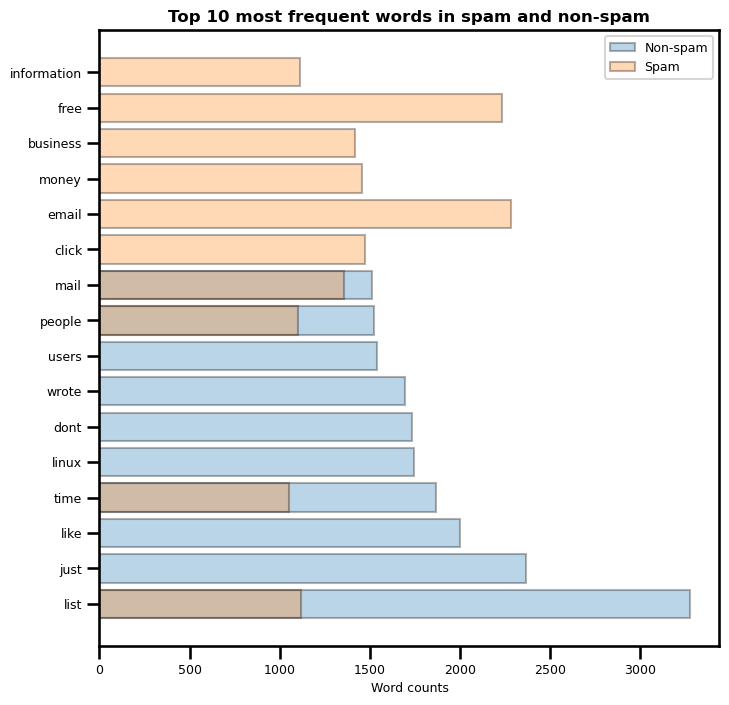

In [8]:
plot_most_common_words(df=df, N=10)

## 💡 Observations

**Frequent "spammish" words**: 

* free
* email
* click
* business
* money

**Frequent "non-spammish" words**:

* just
* like
* linux
* wrote
* users  

**Occur in both top 10 but could be useful for distinctions**:

* list
* time

**Occur in both top 10 but are unlikely to be useful**:

* people
* mail

<div class="alert alert-success">
    
Let's change `N=10` to `N=20` and compare the outcome.
</div>

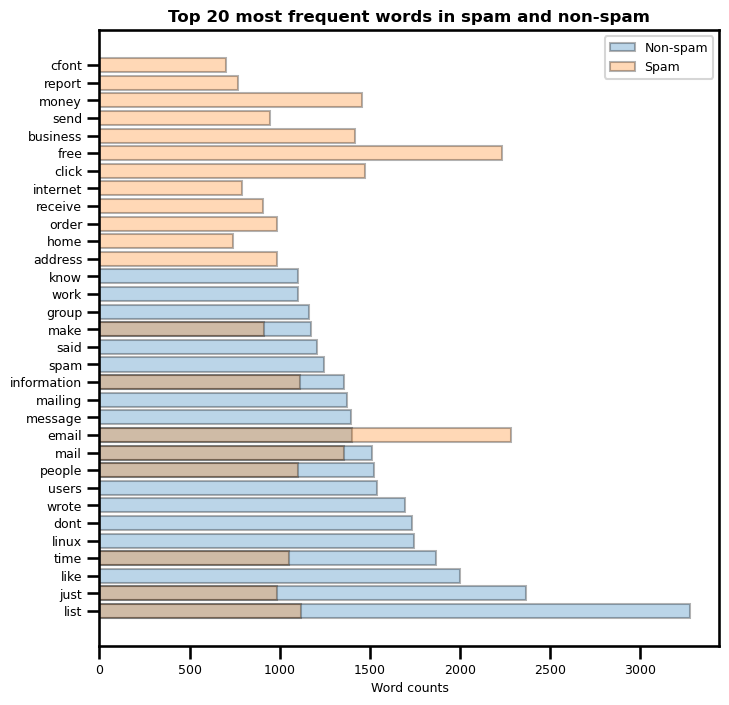

In [9]:
plot_most_common_words(df=df, N=20)

## 💡 Observations

As we use more top words we get more overlap between the classes.  
However words like _email_ or _free_ are still mch more frequent in the **spam** class 

### What about "spammish" signatures?

* Do spams contain more HTML tags? 
* Does non-spam contain more URLs and E-mail adresses? 
* Are spams mails longer than non-spam? 
* ...

Let's find out!

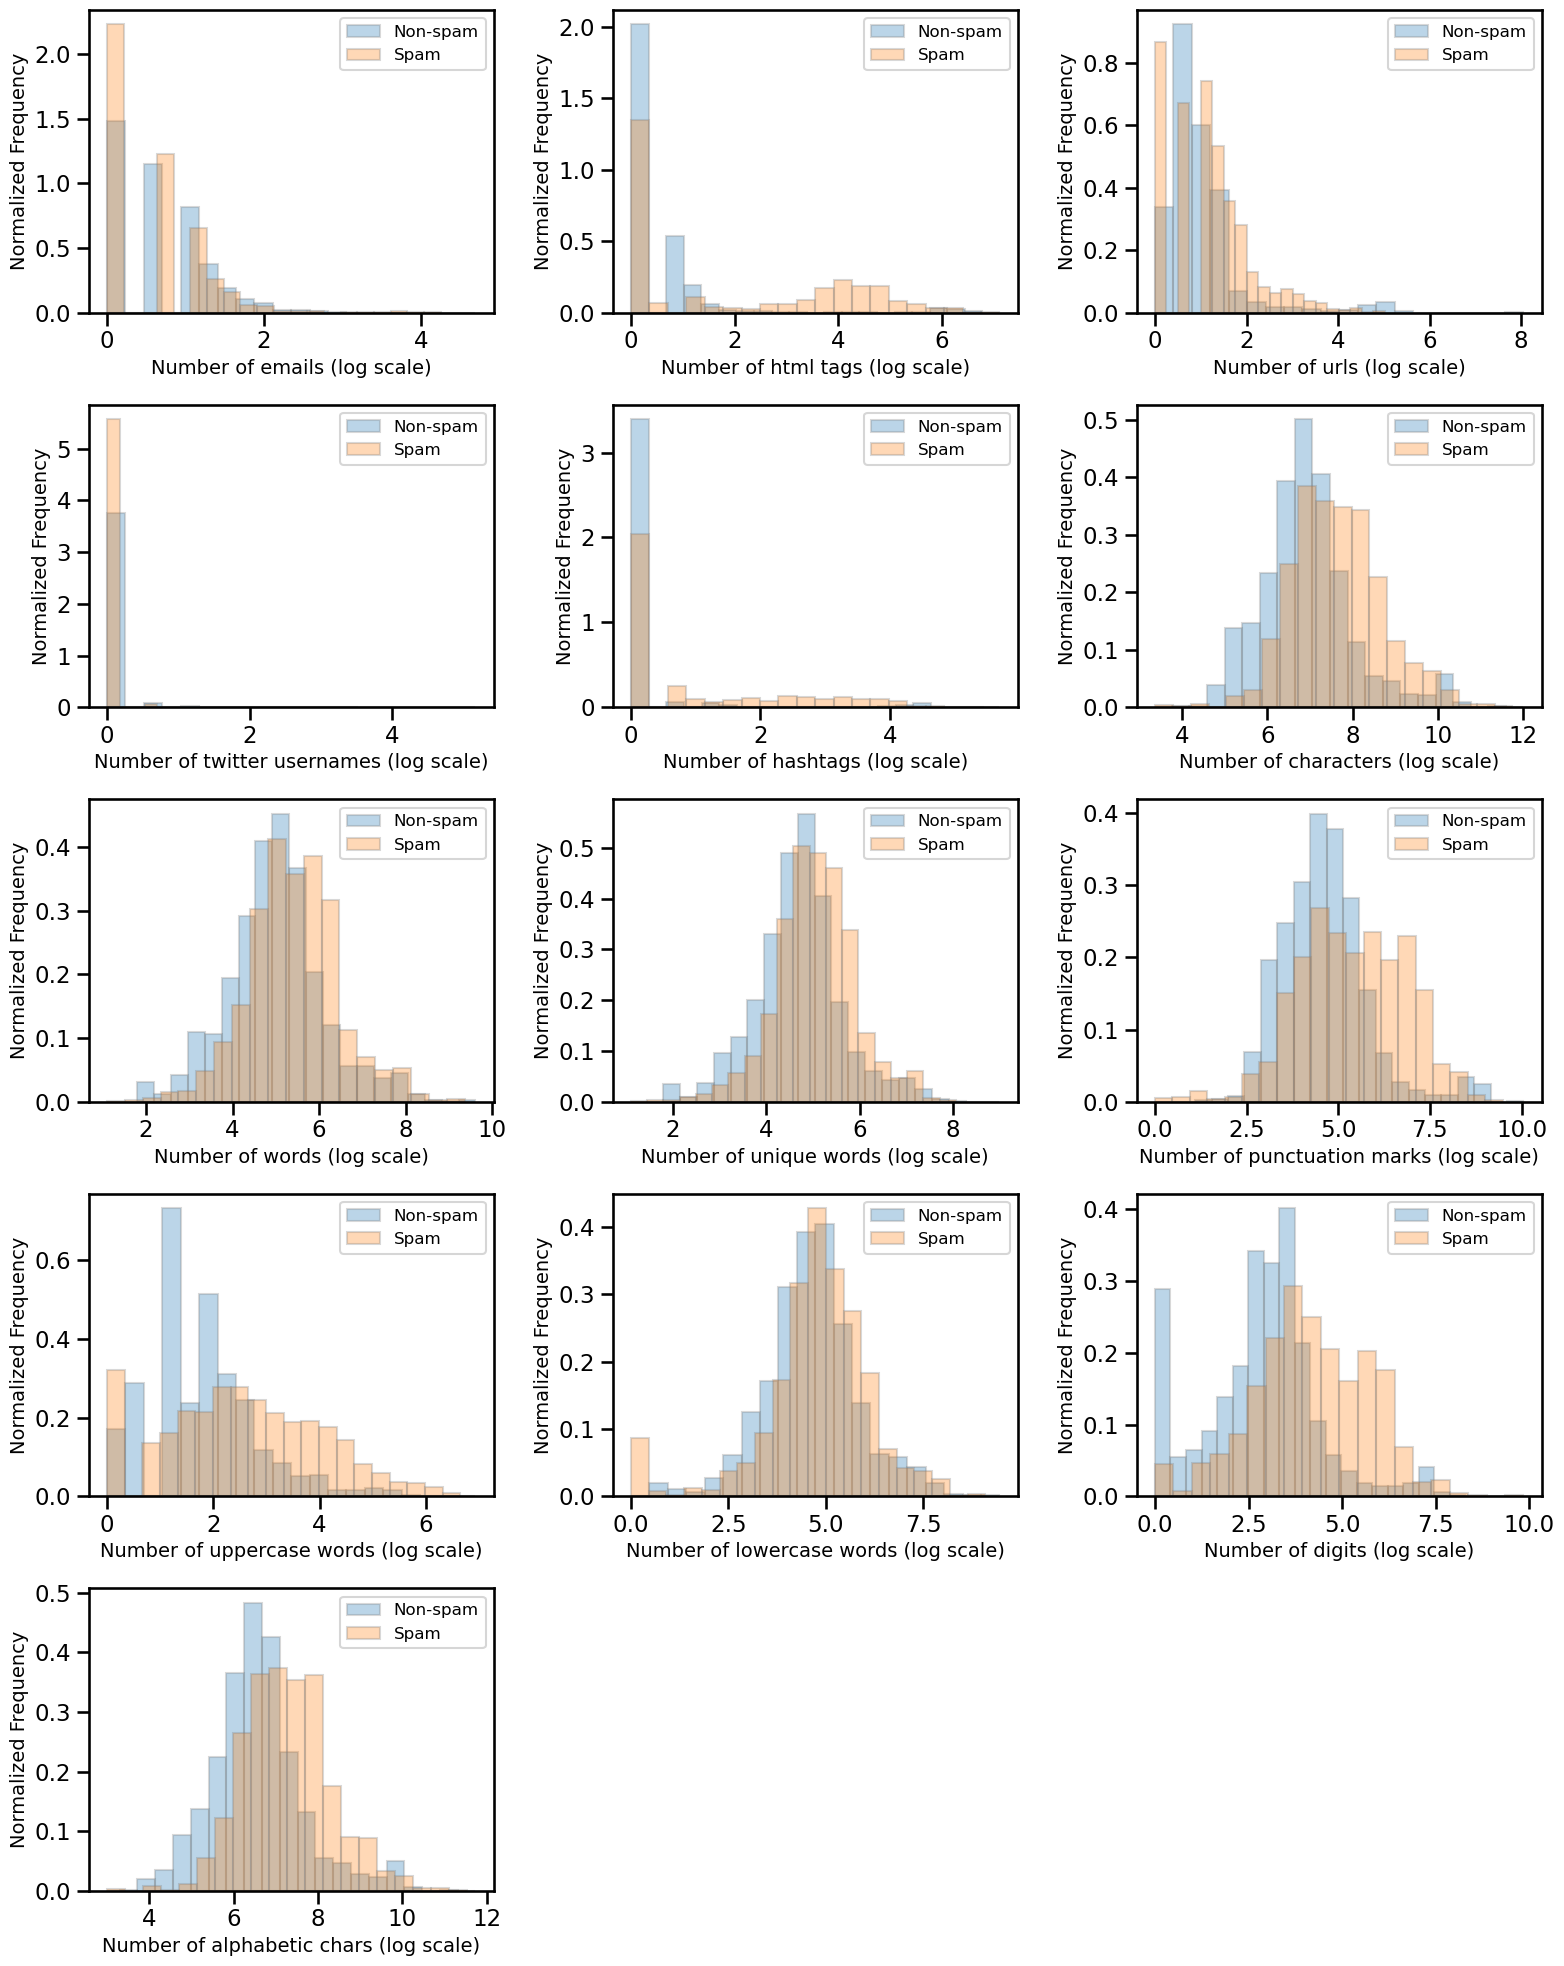

In [10]:
features = get_features(df=df)

## Feature engineering :: Extracting features from text

Computers don't understand natural language. So, how do we represent text?

One of the simplest but effective and commonly used models to represent text for machine learning is the ***Bag of Words*** model ([online documentation](https://en.wikipedia.org/wiki/Bag-of-words_model)). When using this model, we discard most of the structure of the input text (word order, chapters, paragraphs, sentences and formating) and only count how often each word appears in each text. Discarding the structure and counting only word occurencies leads to the mental image of representing text as a "bag".  

**Example:** Let our toy corpus contain four documents.

$ corpus = ['I\;enjoy\;paragliding.',  $  
$\hspace{2cm}'I\;like\;NLP.',$  
$\hspace{2cm}'I\;like\;deep\;learning.',$  
$\hspace{2cm}'O\;Captain!\;my\;Captain!']$ 

In [11]:
show_bag_of_words_vector()

,captain,deep,enjoy,i,learning,like,my,nlp,o,paragliding
Text,,,,,,,,,,
I enjoy paragliding.,0,0,1,1,0,0,0,0,0,1
I like NLP.,0,0,0,1,0,1,0,1,0,0
I like deep learning.,0,1,0,1,1,1,0,0,0,0
O Captain! my Captain!,2,0,0,0,0,0,1,0,1,0


Bag of Words has converted all documents into numeric vectors. Each column represents a word from the corpus and each row one of the four documents. The value in each cell represents the number of times that word appears in a specific document. For example, the fourth document has the word `captain` occuring twice and the words `my` and `O` occuring once.

## Build a spam detector

In the previous section, we saw how to perform text preprocessing and feature extraction from text. We are now ready to build our machine learning model for detecting spams. We will use a Logistic Regression classifier ([online documentation](https://en.wikipedia.org/wiki/Logistic_regression)).

First, split the data into two sets: the `train` set and the `test` set. We will then use the train set to `fit` our model. We will use 5-fold cross-validation. So the validation sets are automatically created internally. The test set will be used to `evaluate` the performance of our model. 

### Baseline

70.3% of samples are non-spam. This naive baseline model would reach 70+% for doing very little.

### Spam classification

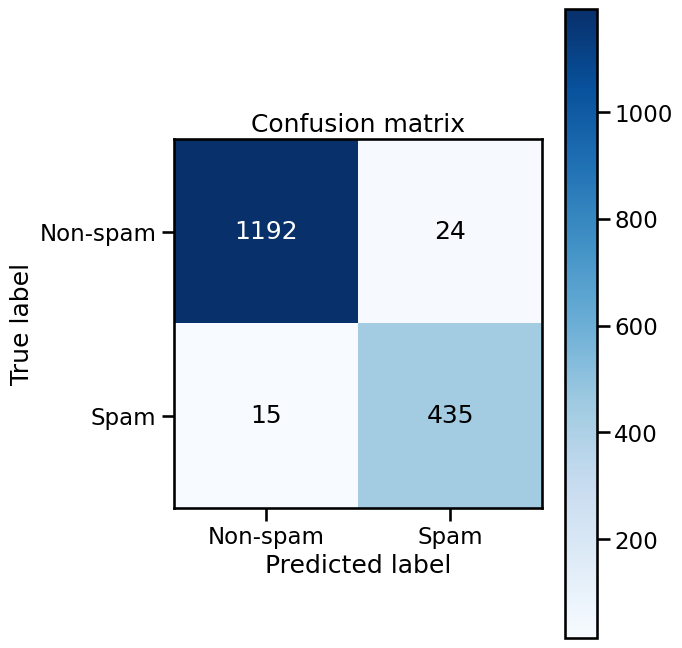

In [12]:
# Train/test splitting
df_train, df_test = train_test_split_(df)

# Fit model on the train data
model = fit_model(df_train)

# Print predictions on test set
plot_confusion_matrix(df_test, model);

**Confusion matrices**  

Confusion matrices are a nice way of evaluating the performance of models for classification models. Rows correspond to the true classes and the columns to the predicted classes. Entries on the main diagonal of the confusion matrix correspond to correct predictions while the other cells tell us how many mistakes made our model ([online documentation](https://en.wikipedia.org/wiki/Confusion_matrix)).

* The first row represents non-spam mails: 1'192 were correctly classified as 'non-spam', while 24 (~1,9%) were misclassified as 'spam'.
* The second row represents spam mails: 435 were correctly classified as 'spam', while 15 (~3,3%) were misclassified as 'non-spam'.

Our model did quite well!

### What did our model learn from the data?

Our logistic regression model has learned which words are the most indicative of non-spam and which words are the most indicative of spam. The positive coefficients on the right correspond to words that, according to the model, are indicative of spam. The negative coefficients on the left correspond to words that, according to the model, are indicative of non-spam.

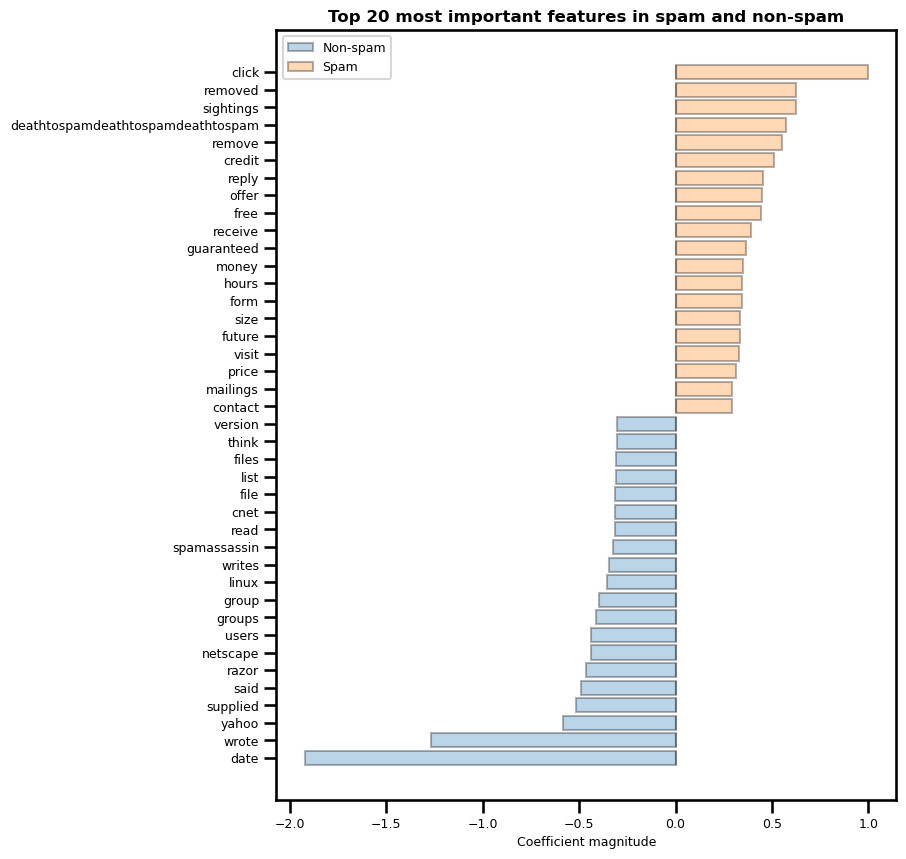

In [13]:
visualize_coefficients(model, n_top_features=20)

## 💡 Observations

- According to the model, words such as "date", "wrote", "yahoo", "supplied", ... are strong indicators of non-spam.  

- Words such as "click", "removed", "sightings",  ... indicate spam.

- These results are consistent with our earlier analysis. For example we had identified "wrote", "said" and "linux" as potential indicators of non-spam ealier. Similarly "click", "credit", "free", and "money" suggested spam.

### Error analysis :: Where does our model fail?

We will now analyze the misclassified mails in order to get some insights on where the model failed to make correct predictions. The *error_analysis* function below will show us the top features responsible for the model making a decision of prediction whether the mail is spam or non-spam.

Document index: 16 


Original Text
<html><body> <center> <font face="arial"><b>Talk on Tele with locals in your area who want to meet
for real encounters. No pre recorded bull this is the real deal. <p> US residents: the 9<!--dads
tools-->00-370-54<!--starter-->65 or 8<!--ender-->88-400-1<!--end-->919. - 99<!--hi hi --> cents /
min <p> For CA callers try our special California line, California is so popular we had to create a
seperate system just for them <p> : 1-<!--moms-->9<!--low-->00-505-7575. <p> must be 18<!--none-->+
be careful when making sexual dates and meetings. Cali 9<!--polic cars-->00# is $1.99 per min
</html> 211075433222 


Cleaned text
talk tele locals area want meet real encounters recorded bull real deal residents cents callers
special california line california popular create seperate just careful making sexual dates meetings
cali 


Actual class:     Spam
Predicted class:  Non-spam 


Predicted probabilities

Non-spam:   0.5239
Spam:       0.4761



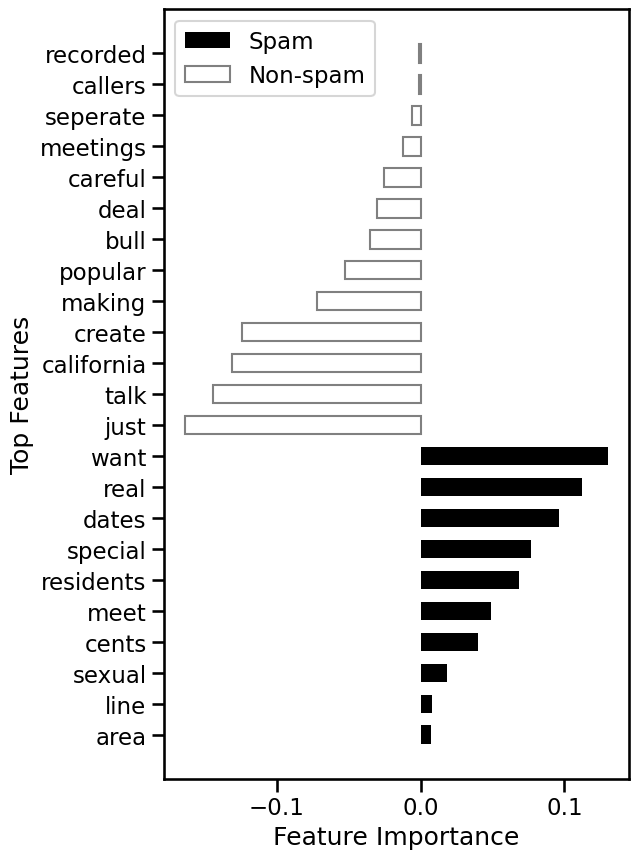

In [14]:
error_analysis(df_test, model, doc_nbr=16)